In [516]:
import random
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [517]:
def create_dataset(size,var,step=2,corr=False):
    val=1
    y=[]
    current_size=0
    while(current_size<size):
        y.append(val+random.randint(-var,var))
        current_size+=1
        if corr=='pos':
            val+=random.randint(0,step)
        elif corr=='neg':
            val-=random.randint(0,step)
    x=[i for i in range(1,len(y)+1)]
    return np.array(x),np.array(y)

In [518]:
def fit_line_para(x,y):
    m=( (mean(x)*mean(y))-(mean(x*y)) )/( (mean(x)**2)-mean(x**2) )
    b=mean(y)-m*mean(x)
    return m,b

In [519]:
def sqr_error(y_orig,y_pred):
    return sum((y_pred-y_orig)**2)

In [520]:
def coeff_of_determination(y_orig,y_pred):
    y_mean=np.array([mean(y_orig) for i in y_orig])
    y_line_error=sqr_error(y_orig,y_pred)
    y_mean_error=sqr_error(y_orig,y_mean)
    return 1-( y_line_error/y_mean_error )


In [521]:
x,y=create_dataset(100,10,corr='neg')

In [524]:
m,b=fit_line_para(x,y)

In [525]:
y_on_line=[m*i+b for i in x]

In [526]:
c=coeff_of_determination(y,y_on_line)

In [527]:
c

0.9402953434436394

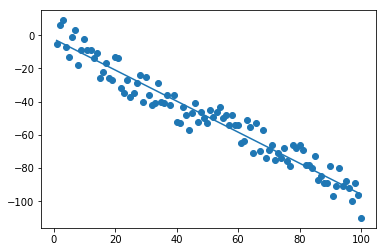

In [528]:
plt.scatter(x,y)
plt.plot(x,y_on_line)